# Australian Labour Market Analysis

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Datasets

In [2]:
national_df = pd.read_csv('Cleaned National Labour Market Data.csv', index_col=0, parse_dates=True)
underemployed_df = pd.read_csv('Cleaned Underemployment Labour Market Data.csv', index_col=0, parse_dates=True)
monthly_work_df = pd.read_csv('Cleaned Monthly Hours Worked Data.csv', index_col=0, parse_dates=True)

## 3. Data Exploration and Visualization

### 3.1 Employment Change from 1978 to 2020

### 3.1.1 Overall Employment Change                     

The following four plots show the overall employment change from Jan 1978 to April 2020. This overall change focuses on analysis in four key areas: employed population, unemployment rate, participation rate and monthly hours worked in all jobs. Seasonally adjusted datasets are used to avoid seasonal impacts. Overall, the employed population, participation rate and monthly hours worked saw a gradual increase with regular fluctuation before a sharp drop during the current pandemic. The current participation rate has dropped to the April average. Similarly, unemployment rate has fluctuated dramatically during the years It peaked in both 1984 and 1994. With the current pandemic we also see the unemployment rate greatly increase.

In [3]:
 def Employment_Change(df, column):
    plt.figure(figsize=(12,5))
    plt.style.use('seaborn-whitegrid')
    ax = df[column].plot()
    plt.plot(df[column].index[-1], df[column][-1], color='purple', marker='o')
    plt.annotate('current figure', xy=(df[column].index[-1], df[column][-1]))
    #horizontal line represent average value in April
    h = df[df['Month']==4][column].mean()
    ax.axhline(h, color='purple', linewidth=1, linestyle='dashed', label='April Average')
    # Remove top and right borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.title('Change in ' + column + ' from 1978 to 2020', size=20)
    plt.xlabel('Year', size=15)
    plt.ylabel(column, size=15)
    plt.show()

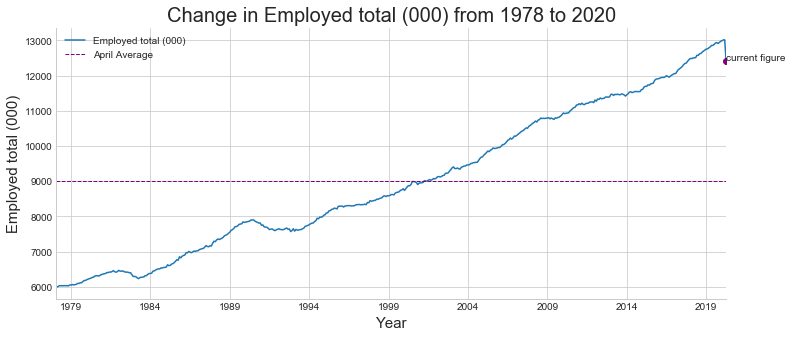

In [4]:
Employment_Change(national_df, 'Employed total (000)')

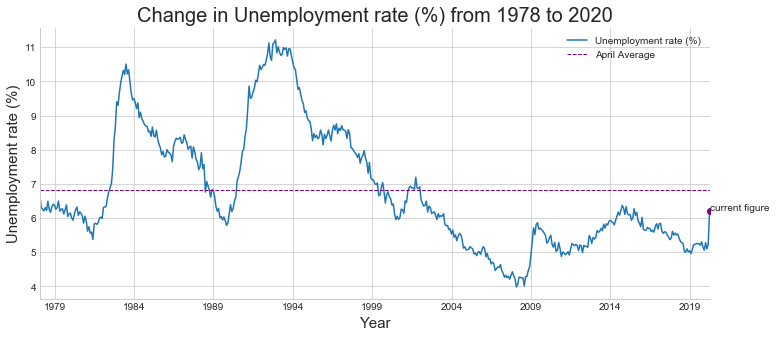

In [5]:
Employment_Change(national_df, 'Unemployment rate (%)')

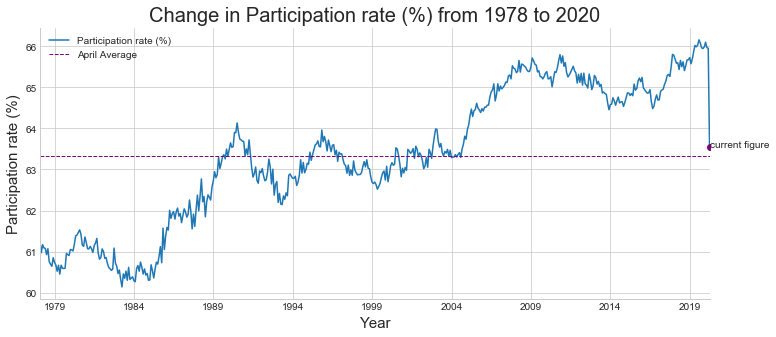

In [6]:
Employment_Change(national_df, 'Participation rate (%)')

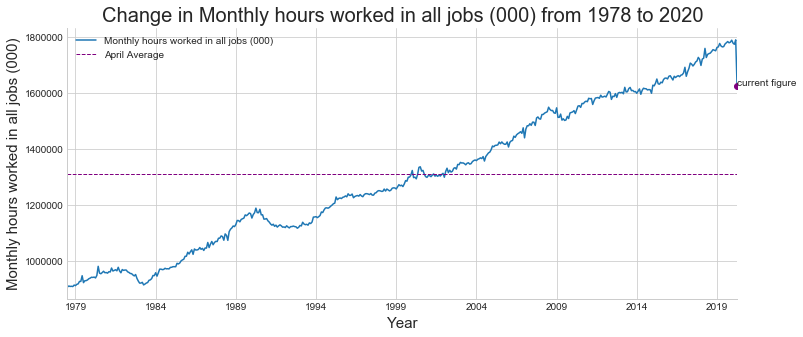

In [7]:
Employment_Change(monthly_work_df, 'Monthly hours worked in all jobs (000)')

### 3.1.2 Overall Change in Monthly Hours Worked Growth

The following line chart demonstrates how the monthly hours worked in Australia changed over the last four decades. To more effective convey this change the graph places an emphasis on the monthly hours worked in the same month (April) each year. Both full-time and part-time monthly hours worked saw regular fluctuation from 1980 to 2018. The degree of change reduced largely from 2018 to 2019 towards negative change before an exponential drop on 2020 of more than 150,000,000 hours.

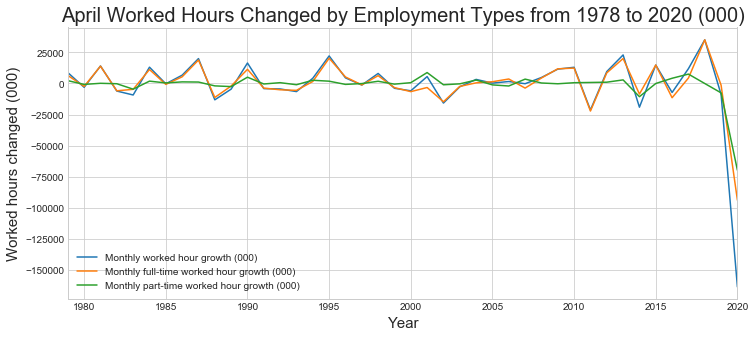

In [8]:
april_work_df = monthly_work_df[monthly_work_df['Month']==4]
plt.figure(figsize=(12,5))
april_work_df['Monthly worked hour growth (000)'].plot()
april_work_df['Monthly full-time worked hour growth (000)'].plot()
april_work_df['Monthly part-time worked hour growth (000)'].plot()
plt.title('April Worked Hours Changed by Employment Types from 1978 to 2020 (000)', size=20)
plt.xlabel('Year', size=15)
plt.ylabel('Worked hours changed (000)', size=15)
plt.legend(loc="best")
plt.show()

### 3.1.3 Correlation between Unemployment rate and Employment to population ratio

This joint plot below presents the correlation between the unemployment rate and employment to population ratio. Both ratios are good indicators of labour market. From this plot it is clear there is a strong correlation between the two factors. When unemployment rate is high, the employment to population ratio drops. 

The histogram sections of the graph demonstrate the distribution of these two ratios. The unemployment rate is a right skewed distribution, the long tail extends to the right while most values cluster on the left. It means most of the years during these four decades saw an unemployment at or around 5 and 6%. Despite the lower occurrence, the unemployment rate could be as high as 11%. Meanwhile, the employment to population ratio showed a multimodal distribution, peaked at 61% and 57%. 


Text(32.625, 0.5, 'Employment to population ratio (%)')

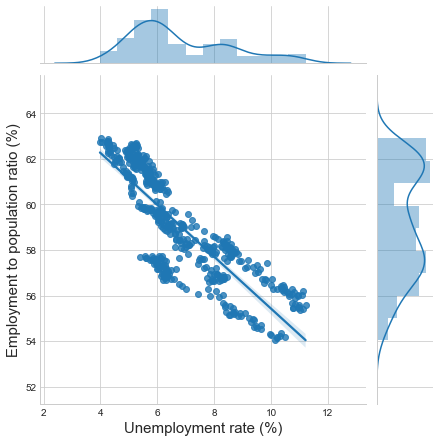

In [9]:
sns.jointplot(x=['Unemployment rate (%)'], y = ['Employment to population ratio (%)'], data = national_df, kind='reg')
plt.xlabel('Unemployment rate (%)', size=15)
plt.ylabel('Employment to population ratio (%)', size=15)


### 3.2 Employment Change from 2015 to 2020

In [10]:
def Half_Decade_Change(df, factor, column1, column2, column3, column4):
    recent_df = df['2015-04-01': '2020-04-01']
    april_df = recent_df[recent_df['Month']==4]
    
    plt.figure(figsize=(12,5))
    barwidth =0.2

    bar1 = april_df[column1]
    bar2 = april_df[column2]
    bar3 = april_df[column3]
    bar4 = april_df[column4]

    # Set position of bar on x axis
    r1 = np.arange(len(bar1))
    r2 = [x + barwidth for x in r1]
    r3 = [x + barwidth for x in r2]
    r4 = [x + barwidth for x in r3]

    # Make the plot
    plt.figure(figsize=(12, 5))
    plt.bar(r1, bar1, color='#0a67ad', width=barwidth, edgecolor='white', label= column1)
    plt.bar(r2, bar2, color='#3a85bd', width=barwidth, edgecolor='white', label= column2)
    plt.bar(r3, bar3, color='#6ca3cd', width=barwidth, edgecolor='white', label= column3)
    plt.bar(r4, bar4, color='#9dc2de', width=barwidth, edgecolor='white', label= column4)
    
    # Add xticks on the middle of the group bars
    plt.xticks([r + barwidth for r in range(len(bar1))], april_df['Year'])

    plt.title( 'Employment Change by '+ factor + ' from 2015 to 2020', size=20)
    plt.xlabel('Year', size=15)
    plt.ylabel('Population (000)', size=15)
    plt.legend(loc="best", bbox_to_anchor = (1,1))
    plt.show()

This bar chart below compares the counts of full-time, part-time, unemployed population as well as population not in the labour force. Unemployment rate is the most popular indicator used for describing the economy and the labour market. It is also important to be aware that only people who lost their job and actively looking for work are regarded as unemployed. Whereas people who are not actively looking for a job or have no jobs available are not counted in the labour force. From this graph, the population not in the labour force is the second biggest population group in terms of employment status. The percentage of population with a part-time job occupies almost half when compared to full-time work.  The unemployed population is the minority during these five years. The graph has shown the population by unit (000), subsequently, the yearly change in different employment status are not very noticeable.  Nevertheless, the number not in labour force category witnessed an increase in this year. 

<Figure size 864x360 with 0 Axes>

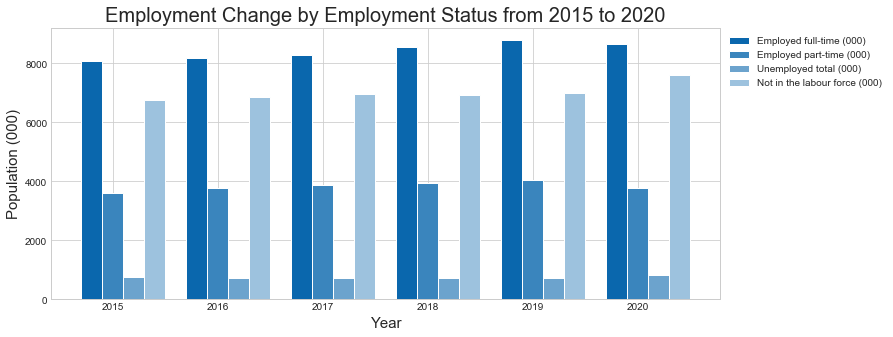

In [11]:
Half_Decade_Change(national_df, 'Employment Status', 'Employed full-time (000)', 'Employed part-time (000)', 'Unemployed total (000)', 
              'Not in the labour force (000)')

This graph illustrates the change in underemployment for both full time and part time employment types for the last five years. It is clear to see the underemployment number for both full time and part time were very stable from 2015 to 2019, before witnessing a sharp increase in 2020.   

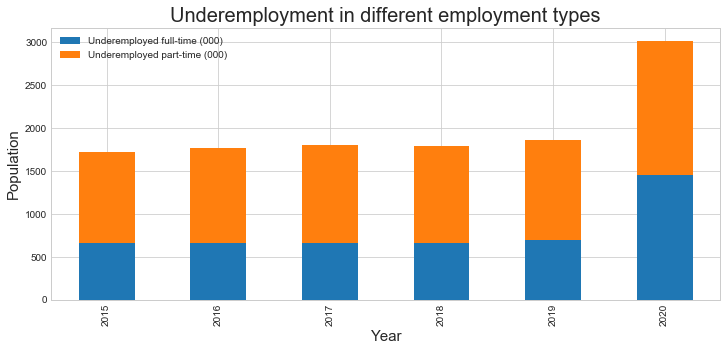

In [12]:
april_underemployed_df = underemployed_df[underemployed_df['Month']==4]
ax = april_underemployed_df[['Underemployed full-time (expanded analytical series) (000)', 
                       'Underemployed part-time (expanded analytical series) (000)']].plot(kind='bar', 
                        stacked=True, figsize=(12,5))
fig = ax.get_figure()
plt.title('Underemployment in different employment types', size=20)
x = np.arange(len(april_underemployed_df.index))
plt.xticks(x, labels=('2015', '2016', '2017', '2018', '2019', '2020'))
plt.xlabel('Year', size=15)
plt.ylabel('Population', size=15)
plt.legend(loc="upper left", labels = ['Underemployed full-time (000)', 'Underemployed part-time (000)'])
plt.show()

### 3.3 Current Employment Situation

These following three donut charts show the composition of labour force, employment status and both genders in different employment types in April 2020.

Even though the employed population occupy the largest proportion at 59.6%, the second donut graph indicates there is still more than one third of the population which are not counted as being in the labour force. 


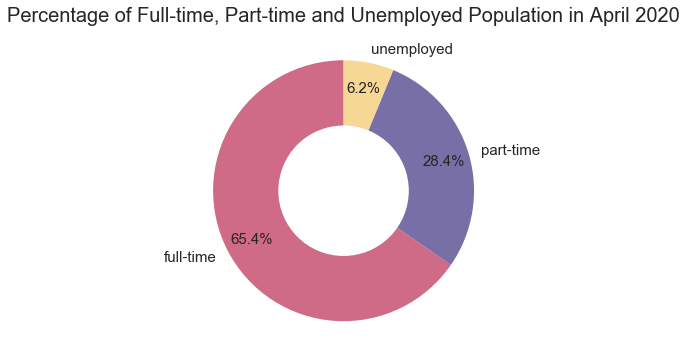

In [13]:

current_df= national_df.iloc[-1]
labels = 'full-time', 'part-time', 'unemployed'

sizes=[current_df['Employed full-time (000)'], current_df['Employed part-time (000)'], current_df['Unemployed total (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':15}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Full-time, Part-time and Unemployed Population in April 2020', size=20)
plt.show()

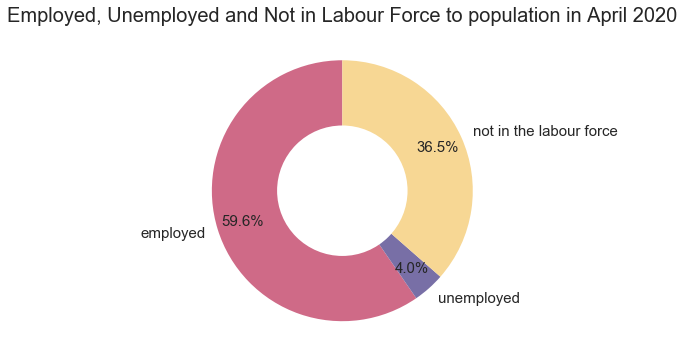

In [14]:
labels = 'employed', 'unemployed', 'not in the labour force'

sizes=[current_df['Employed total (000)'], current_df['Unemployed total (000)'], current_df['Not in the labour force (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, textprops={'fontsize':15}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Employed, Unemployed and Not in Labour Force to population in April 2020', size=20)
plt.show()

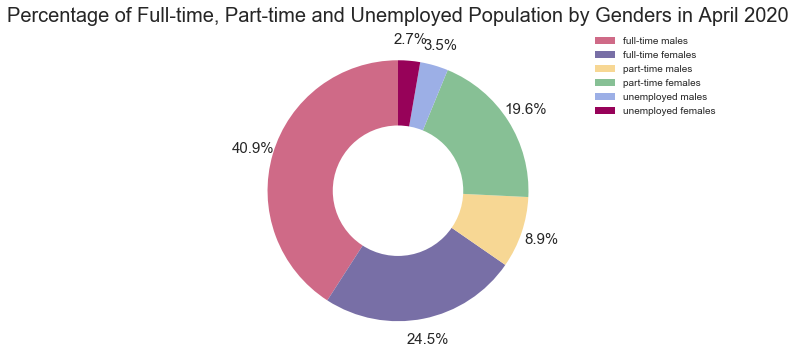

In [15]:
labels = 'full-time males', 'full-time females', 'part-time males', 'part-time females', 'unemployed males', 'unemployed females'

sizes=[current_df['Employed full-timeMales (000)'], current_df['Employed full-timeFemales (000)'], 
       current_df['Employed part-timeMales (000)'], current_df['Employed part-timeFemales (000)'], 
       current_df['Unemployed totalMales (000)'], current_df['Unemployed totalFemales (000)']]
custom_colours = ['#cf6a87', '#786fa6', '#f7d794', '#87C095', '#9CAFE6', '#970259']
#explode=(0.1, 0, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, textprops={'fontsize':15}, autopct='%1.1f%%', shadow=False, 
        startangle=90, colors=custom_colours, pctdistance=1.16)
plt.legend(labels, loc="upper right", bbox_to_anchor = (1.5,1))
#draw circle
centre_circle = plt.Circle((0, 0), radius=0.5, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Percentage of Full-time, Part-time and Unemployed Population by Genders in April 2020', size=20)
plt.show()

The last three horizontal bar charts explain the comparison for worked hours in each state, underemployment for each age groups and reasons causing underemployment in April 2020. 

States in Australia have vastly different populations. It may not be practical to compare the total monthly worked hours in each state. Instead the hours worked per thousand people is a better indicator. This data was calculated in the data preparation stage for each state. The first graph shows that Australian Capital Territory had the highest working hours this April with more than 75,000 hours per thousand people, slightly higher than the second placed Northern Territory. 

Similarly, comparing the underemployment number for each age group is not informative. The population in each age group are greatly different. The underemployment rate for each age group were calculated and compared. The age group which has the largest underemployment rate is from 15 to 24 years old, 15% more than the second age group-- people in their late 20 and early 30s. 

Despite the amount of people who would prefer more hours, the last bar chart shows that for economic reasons this has caused a significant impact on underemployment for a large proportion of the population.


Text(0.5, 1.0, 'Hours Worked per thousand people in Each State in April 2020')

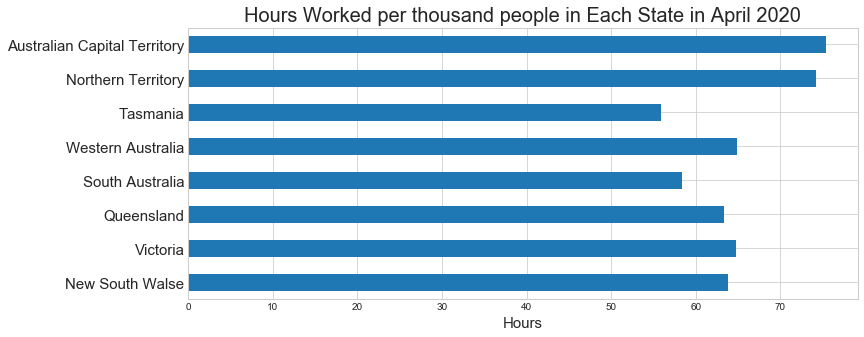

In [16]:
current_workhour= monthly_work_df.iloc[-1]
state_workhours = current_workhour.filter(items = ['Monthly hours worked per thousand people New South Wales(000)', 
        'Monthly hours worked per thousand people Victoria(000)', 'Monthly hours worked per thousand people Queensland(000)', 
        'Monthly hours worked per thousand people South Australia(000)', 'Monthly hours worked per thousand people Western Australia(000)', 
        'Monthly hours worked per thousand people Tasmania(000)', 'Monthly hours worked per thousand people Northern Territory(000)', 
        'Monthly hours worked per thousand people Australian Capital Territory(000)'])
plt.figure(figsize=(12,5))
state_workhours.plot(kind = 'barh')
plt.yticks(ticks = np.arange (8), labels = ['New South Walse', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 
                                             'Tasmania', 'Northern Territory', 'Australian Capital Territory'], size=15)
plt.xlabel('Hours', size=15)
plt.title('Hours Worked per thousand people in Each State in April 2020', size=20)

Text(0.5, 1.0, 'Underemployment rate for each age group in April (%) 2020')

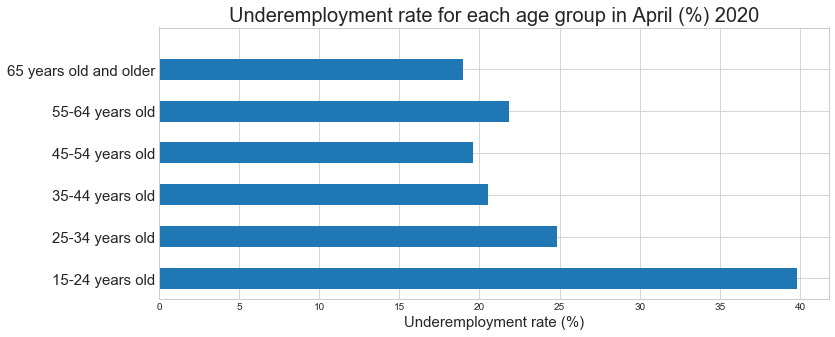

In [17]:
current_underemployed= underemployed_df.iloc[-1]
underemployment_agegroup = current_underemployed.filter(items = ['15-24 years underemployment rate (%)', 
        '25-34 years underemployment rate (%)', '35-44 years underemployment rate (%)', 
        '45-54 years underemployment rate (%)', '55-64 years underemployment rate (%)', 
        '65 years and over underemployment rate (%)'])
plt.figure(figsize=(12,5))
underemployment_agegroup.plot(kind = 'barh')
plt.yticks(ticks = np.arange (7), labels = ['15-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 
                                             '55-64 years old', '65 years old and older'], size=15)
plt.xlabel('Underemployment rate (%)', size =15)
plt.title('Underemployment rate for each age group in April (%) 2020', size=20)

Text(0.5, 1.0, 'Different reasons caused underemployment (000) in April 2020')

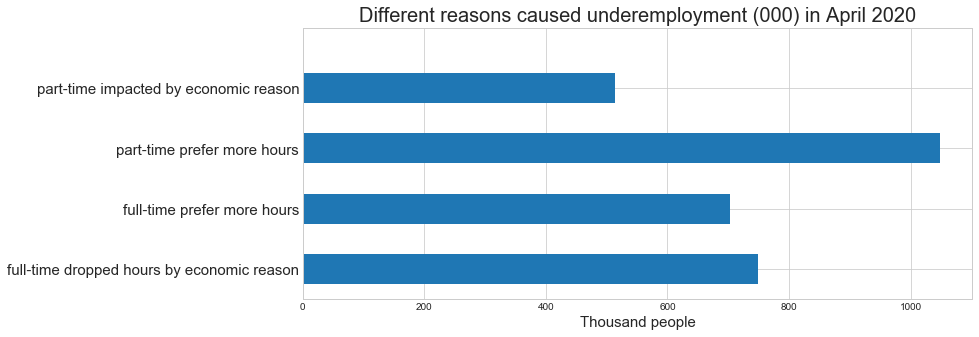

In [18]:
current_underemployed= underemployed_df.iloc[-1]
underemployment_reason = current_underemployed.filter(items = ['Underemployed full-time (worked part-time for economic reasons) (000)', 
        'Underemployed full-time (prefer more hours) (000)', 'Underemployed part-time (prefer more hours) (000)', 
        'Underemployed part-time (worked less than usual hours for economic reasons) (000)'])
plt.figure(figsize=(12,5))
underemployment_reason.plot(kind = 'barh')
plt.yticks(ticks = np.arange (5), labels = ['full-time dropped hours by economic reason', 'full-time prefer more hours', 
                                            'part-time prefer more hours', 'part-time impacted by economic reason'], size=15)
plt.xlabel('Thousand people', size=15)
plt.title('Different reasons caused underemployment (000) in April 2020', size=20)